In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
mean = train_data.mean(axis=0)

In [6]:
train_data -= mean # train_data = train_data - mean과 같은 의미

In [7]:
# 표준 편차 구하기

std = train_data.std(axis=0)

In [8]:
train_data /= std

In [9]:
train_data  # 훈련 데이터 정규화

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
test_data -= test_data.mean(axis=0)
test_data /= test_data.std(axis=0)

In [11]:
test_data   # 테스트 데이터 정규화

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [28]:
# 신경망 구축
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model

In [40]:
# K-folder 검증 -> 보유한 데이터의 수가 적어서 쪼개기 아까울 경우 사용하는 방법
k = 4

num_val_samples = len(train_data) // k # 폴더의 사이즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)

    # 검증 데이터 준비: k번째 분할
    val_data = train_data[(i*num_val_samples):((i+1)*num_val_samples)]
    val_labels = train_labels[(i*num_val_samples):((i+1)*num_val_samples)]
    
    # 훈련 데이터 준비
    partial_train_data = np.concatenate([train_data[:(i*num_val_samples)],
        train_data[(i+1)*num_val_samples:]], axis=0)

    partial_train_labels = np.concatenate([train_labels[:(i*num_val_samples)],
        train_labels[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_labels,
        epochs=20, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_labels)
    all_scores.append(val_mae)


처리중인 폴드 # 0
4/4 [==============================] - 0s 1ms/step - loss: 11.2234 - mae: 2.2194
처리중인 폴드 # 1
4/4 [==============================] - 0s 2ms/step - loss: 10.5547 - mae: 2.5302
처리중인 폴드 # 2
4/4 [==============================] - 0s 2ms/step - loss: 15.2690 - mae: 2.6736
처리중인 폴드 # 3
4/4 [==============================] - 0s 1ms/step - loss: 14.7979 - mae: 2.8254


In [26]:
all_scores

[2.802307367324829, 2.455913782119751, 2.623833417892456, 2.3542768955230713]

In [27]:
np.mean(all_scores)

2.559082865715027

In [37]:
# K-folder 검증 -> 보유한 데이터의 수가 적어서 쪼개기 아까울 경우 사용하는 방법
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k # 폴더의 사이즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)

    # 검증 데이터 준비: k번째 분할
    val_data = train_data[(i*num_val_samples):((i+1)*num_val_samples)]
    val_labels = train_labels[(i*num_val_samples):((i+1)*num_val_samples)]
    
    # 훈련 데이터 준비
    partial_train_data = np.concatenate([train_data[:(i*num_val_samples)],
        train_data[(i+1)*num_val_samples:]], axis=0)

    partial_train_labels = np.concatenate([train_labels[:(i*num_val_samples)],
        train_labels[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels,
            epochs=num_epochs, batch_size=4,
            validation_data=(val_data, val_labels), verbose=0)
    mae_history = history.history['mae']

    val_mse, val_mae = model.evaluate(val_data, val_labels)
    all_scores.append(mae_history)


처리중인 폴드 # 0
4/4 [==============================] - 0s 1ms/step - loss: 8.8187 - mae: 2.1827
처리중인 폴드 # 1
4/4 [==============================] - 0s 1ms/step - loss: 29.0210 - mae: 2.8380
처리중인 폴드 # 2
4/4 [==============================] - 0s 2ms/step - loss: 18.1270 - mae: 2.8473
처리중인 폴드 # 3
4/4 [==============================] - 0s 1ms/step - loss: 14.6136 - mae: 2.7634


In [38]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

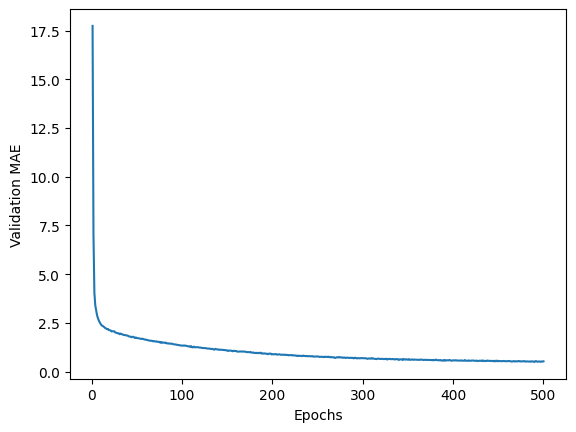

In [39]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

전체 시행의 평균값을 그래프로 나타냄
80회 시행까지 빠르게 error가 감소하고, 이후 천천히 감소함